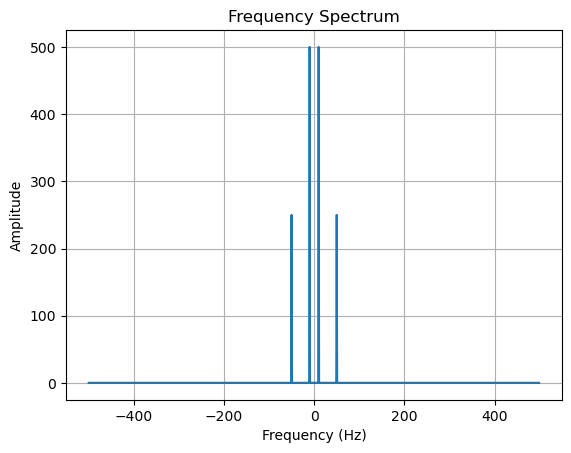

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Random data
fs = 1000
t = np.arange(0, 1, 1/fs)
f1 = 10
f2 = 50
signal = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)

# FFT
fft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), 1/fs)

fft_result = np.fft.fft(signal)

# Plot
plt.figure()
plt.plot(freqs, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()


In [1]:
import numpy as np
import os
from sklearn.manifold import TSNE
from PIL import Image
import matplotlib.pyplot as plt
import csv

output_dir = "output"
output_contents = os.listdir(output_dir)
output_contents = sorted(output_contents)
# output_contents
# output_contents_sorted

In [6]:
# Parameters
img_size = (64, 64)  # Resize all images to this size
n_samples = len(output_contents)  # Number of images to load

# Load and preprocess the images
images = []
for filename in output_contents[:n_samples]:
    img_path = os.path.join(output_dir, filename)
    img = Image.open(img_path)
    img_resized = img.resize(img_size)
    img_array = np.array(img_resized)
    img_flattened = img_array.flatten()
    images.append(img_flattened)

# Convert the list of images to a 2D array
images = np.array(images)
images_better = images.tolist()
# list(images[0])

def export_to_csv(data, filename):
    # Check if the data is not empty
    if not data:
        print("Data array is empty. Nothing to export.")
        return

    try:
        with open(filename, 'w', newline='') as csvfile:
            # Create a CSV writer object
            csv_writer = csv.writer(csvfile)

            # Write the data to the CSV file
            for row in data:
                csv_writer.writerow(row)

        print(f"Data successfully exported to '{filename}'.")
    except IOError:
        print(f"Error: Unable to write to '{filename}'.")

# Call the function to export the data to a CSV file
export_to_csv(images_better, "output.csv")

Data successfully exported to 'output.csv'.


In [8]:
tsne = TSNE(n_components=3, random_state=42)
embedding = tsne.fit_transform(images)

embedding.shape
export_to_csv(embedding.tolist(), "pls_work3.csv")


# # Perform UMAP dimensionality reduction
# reducer = UMAP(random_state=42)
# embedding = reducer.fit_transform(images)

# embedding.shape

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

/tmp/ipykernel_57/722954071.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral')


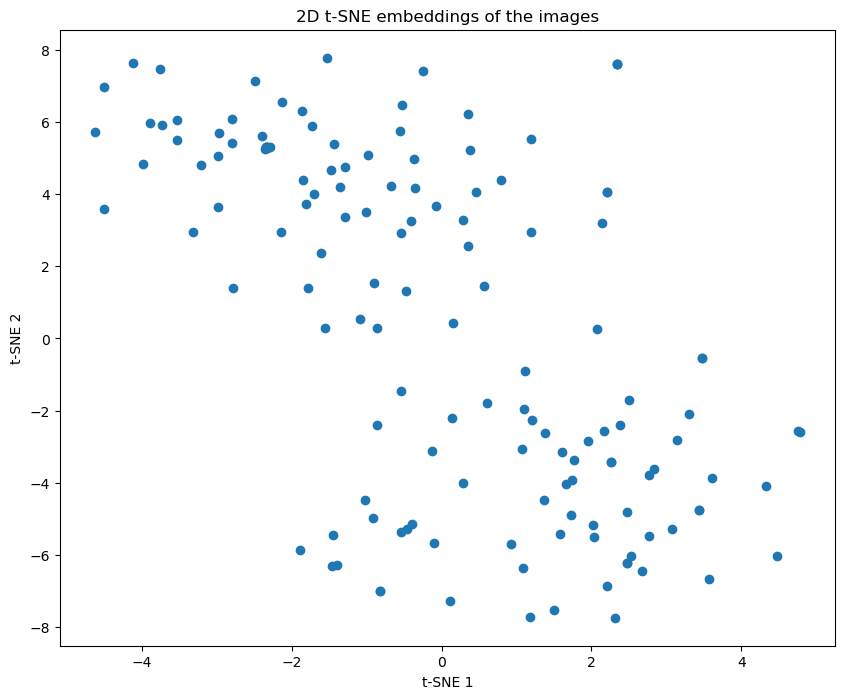

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral')
plt.title('2D t-SNE embeddings of the images')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [13]:
import json
import os
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

def process_json_file(json_file_path):
    with open(json_file_path, 'r') as json_file:
        json_data = json.load(json_file)

    time_uploaded = json_data.get('time-uploaded', None)
    user_id = json_data.get('userId', None)
    dominant_hand = json_data.get('dominantHand', None)
    drawn_hand = json_data.get('drawnHand', None)
    is_parkinson_patient = json_data.get('isParkinsonPatient', None)

    # Combine the t-SNE reduced data with the extracted information from the JSON
    combined_data = (np.array([[time_uploaded, user_id, dominant_hand, drawn_hand, is_parkinson_patient]]))

    return combined_data

# Directory containing all the JSON files
json_directory = 'data_json'

# List all JSON files in the directory
json_files = [file for file in os.listdir(json_directory)]
json_files = sorted(json_files)
json_files
# Loop through each JSON file, process it, and store the combined data
all_combined_data = []
for json_file in json_files:
    json_file_path = os.path.join(json_directory, json_file)
    combined_data = process_json_file(json_file_path).squeeze().tolist()
    all_combined_data.append(combined_data)
    
all_combined_data
export_to_csv(all_combined_data, "yay.csv")

# # Export the combined data to a single CSV file
# output_filename = 'output_combined.csv'
# with open(output_filename, 'w', newline='') as csvfile:
#     csv_writer = csv.writer(csvfile)

#     # Write the header row
#     header = ['tsne_x', 'tsne_y', 'id', 'info1', 'info2']
#     csv_writer.writerow(header)

#     # Write each row of combined data from each JSON file
#     for combined_data in all_combined_data:
#         csv_writer.writerows(combined_data)

# print(f"Data from {len(json_files)} JSON files successfully exported to '{output_filename}'.")

Data successfully exported to 'yay.csv'.
